<a href="https://colab.research.google.com/github/abdulloyev/DataScientis-openSource/blob/main/Topshiriq%20%231.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Kerakli kutubxonalarni chaqirib olamiz

In [ ]:
import numpy as np
import pandas as pd

import seaborn as sns
import matplotlib.pyplot as plt

## Ma'lumotlarni Yig'ib o'qib olamiz

In [ ]:
# Fayilni linki `Uy_bazasi_2`
file_link = "https://drive.google.com/uc?export=download&id=1C4bGEgNbehQxSWZrPl_jukmjk1TruFMI"
# https://drive.google.com/file/d/1C4bGEgNbehQxSWZrPl_jukmjk1TruFMI/view?usp=sharing

In [ ]:
# failni GoogleSheets dan o'qib olamiz
df = pd.read_csv(file_link, index_col=0)

In [ ]:
# DataFrame ning 5 ta satrini ko'rib olamiz
df.head()

,kenglik,uy-joy_o'rtacha_yoshi,jami_xonalar,jami_yotoqxonalar,aholi,xo'jaliklari,median_daromad,okean_yaqinligi,median_uy_qiymati
uzunlik,,,,,,,,,
-122.23,37.88,41,880,129.0,322,126,8.3252,NEAR BAY,452600
-122.22,37.86,21,7099,1106.0,2401,1138,8.3014,NEAR BAY,358500
-122.24,37.85,52,1467,190.0,496,177,7.2574,NEAR BAY,352100
-122.25,37.85,52,1274,235.0,558,219,5.6431,NEAR BAY,341300
-122.25,37.85,52,1627,280.0,565,259,3.8462,NEAR BAY,342200


## Ma'lumotlarni tahlil qilib olamiz

In [ ]:
# umumiy dataFrame haqidagi malumotlarni tekshiramiz
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 20640 entries, -122.23 to -121.24
Data columns (total 9 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   kenglik                20640 non-null  float64
 1   uy-joy_o'rtacha_yoshi  20640 non-null  int64  
 2   jami_xonalar           20640 non-null  int64  
 3   jami_yotoqxonalar      20433 non-null  float64
 4   aholi                  20640 non-null  int64  
 5   xo'jaliklari           20640 non-null  int64  
 6   median_daromad         20640 non-null  float64
 7   okean_yaqinligi        20640 non-null  object 
 8   median_uy_qiymati      20640 non-null  int64  
dtypes: float64(3), int64(5), object(1)
memory usage: 1.6+ MB


## Uning `NaN` qiymatlarini tekshirib olamiz.

In [ ]:
# ustunlardagi NaN qiymatlar soni
df.isnull().sum()

,0
kenglik,0
uy-joy_o'rtacha_yoshi,0
jami_xonalar,0
jami_yotoqxonalar,207
aholi,0
xo'jaliklari,0
median_daromad,0
okean_yaqinligi,0
median_uy_qiymati,0


## Ma'lumotlarni Tozalash

> NaN qiymatlarni bartaraf etish va kategorik ma'lumotlarni raqamli ko'rinishga o'tkazish.

In [ ]:
# NaN qiymatlarni to'ldirish
# df.fillna(df.median(), inplace=True)

# Kategorik ma'lumotlarni raqamli ko'rinishga o'tkazish
df = pd.get_dummies(df, columns=['okean_yaqinligi'], drop_first=True)
df.head()

,kenglik,uy-joy_o'rtacha_yoshi,jami_xonalar,jami_yotoqxonalar,aholi,xo'jaliklari,median_daromad,median_uy_qiymati,okean_yaqinligi_INLAND,okean_yaqinligi_ISLAND,okean_yaqinligi_NEAR BAY,okean_yaqinligi_NEAR OCEAN
uzunlik,,,,,,,,,,,,
-122.23,37.88,41,880,129.0,322,126,8.3252,452600,False,False,True,False
-122.22,37.86,21,7099,1106.0,2401,1138,8.3014,358500,False,False,True,False
-122.24,37.85,52,1467,190.0,496,177,7.2574,352100,False,False,True,False
-122.25,37.85,52,1274,235.0,558,219,5.6431,341300,False,False,True,False
-122.25,37.85,52,1627,280.0,565,259,3.8462,342200,False,False,True,False


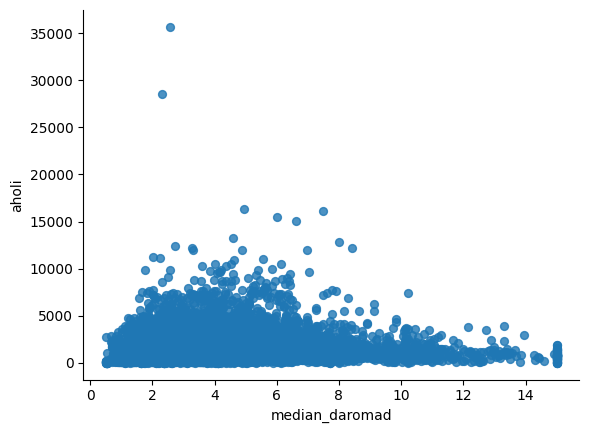

In [ ]:
# @title jami_yotoqxonalar vs aholi

from matplotlib import pyplot as plt
df.plot(kind='scatter', x='median_daromad', y='aholi', s=32, alpha=.8)
plt.gca().spines[['top', 'right',]].set_visible(False)

## Xususiyatlarning Korrelyatsion Tahlili

> Xususiyatlar orasidagi korrelyatsiyani ko'rish.

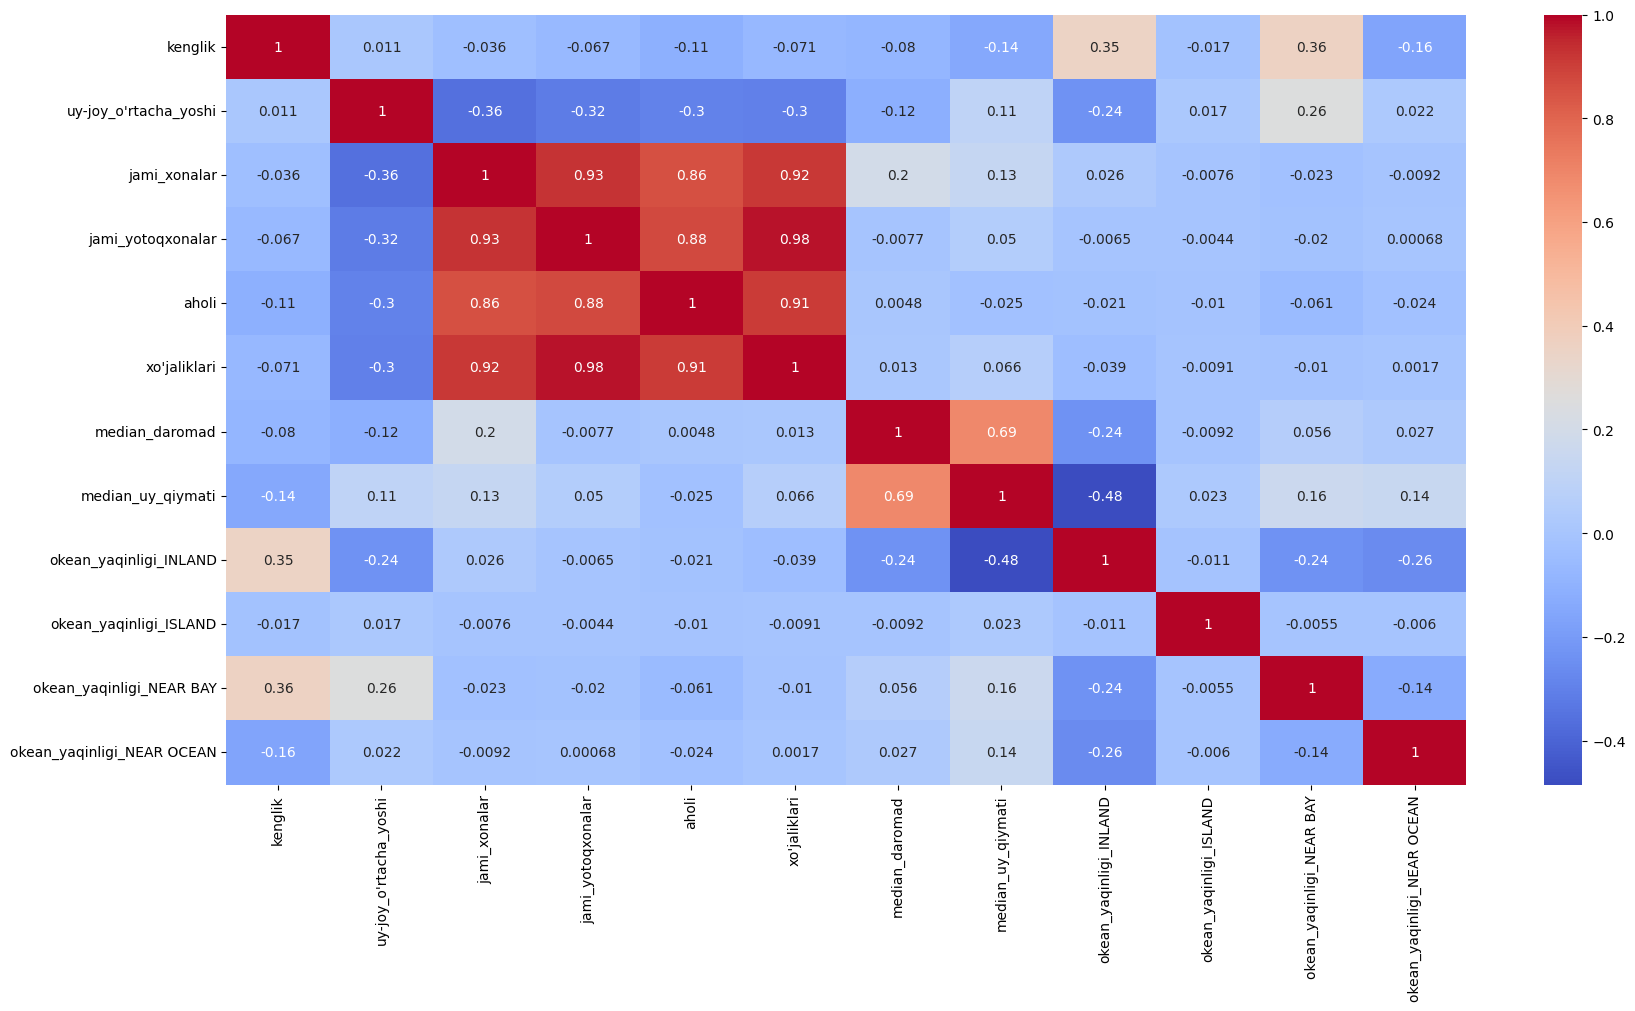

In [ ]:
# Korrelyatsiya matritsasi
corr_matrix = df.corr()
plt.figure(figsize=(20, 10))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm')
plt.show()